In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_co_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        27.3215 (21.1410, 36.0609) (20.6844, 35.1942) 14.5098 (Jnode 202)\n',
 't_n104        21.1715 (17.2842, 26.5404) (16.9330, 25.9900)  9.0570 (Jnode 201)\n',
 't_n105        20.2245 (16.5561, 25.3357) (16.2001, 24.7424)  8.5423 (Jnode 200)\n',
 't_n106        18.1571 (14.9498, 22.6443) (14.5621, 21.9955)  7.4335 (Jnode 199)\n',
 't_n107        17.5371 (14.4703, 21.8113) (14.1584, 21.2791)  7.1207 (Jnode 198)\n',
 't_n108        16.4437 (13.6230, 20.4265) (13.3197, 19.9283)  6.6086 (Jnode 197)\n',
 't_n109         8.9938 ( 7.8024, 11.0056) ( 7.6934, 10.7153)  3.0219 (Jnode 196)\n',
 't_n110         8.9067 ( 7.7351, 10.8955) ( 7.5576, 10.5369)  2.9793 (Jnode 195)\n',
 't_n111         8.6181 ( 7.4940, 10.5294) ( 7.3389, 10.1865)  2.8476 (Jnode 194)\n',
 't_n112         8.2414 ( 7.1762, 10.0626) ( 7.0557,  9.7635)  2.7078 (Jnode 193)\n',
 't_n113         7.8890 ( 6.8746,  9.6152) ( 6.7397,  9.3106)  2.5710 (Jnode 192)\n',
 't_n114         5.3872 ( 4.6600,  6.4457) ( 4.5535,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    print(line)
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    # if line[3].startswith('('):
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # else:
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # print(line[4])
    # if line[4].startswith('('):
    #     
    #     upper_ci_iqtree.append(float(line[4][1:-1].strip()))
    # else:
    #     upper_ci_iqtree.append(float(line[4][:-1].strip()))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

['t_n103', '27.3215', '(21.1410,', '36.0609)', '(20.6844,', '35.1942)', '14.5098', '(Jnode', '202)']
['t_n104', '21.1715', '(17.2842,', '26.5404)', '(16.9330,', '25.9900)', '9.0570', '(Jnode', '201)']
['t_n105', '20.2245', '(16.5561,', '25.3357)', '(16.2001,', '24.7424)', '8.5423', '(Jnode', '200)']
['t_n106', '18.1571', '(14.9498,', '22.6443)', '(14.5621,', '21.9955)', '7.4335', '(Jnode', '199)']
['t_n107', '17.5371', '(14.4703,', '21.8113)', '(14.1584,', '21.2791)', '7.1207', '(Jnode', '198)']
['t_n108', '16.4437', '(13.6230,', '20.4265)', '(13.3197,', '19.9283)', '6.6086', '(Jnode', '197)']
['t_n109', '8.9938', '(', '7.8024,', '11.0056)', '(', '7.6934,', '10.7153)', '3.0219', '(Jnode', '196)']
['t_n110', '8.9067', '(', '7.7351,', '10.8955)', '(', '7.5576,', '10.5369)', '2.9793', '(Jnode', '195)']
['t_n111', '8.6181', '(', '7.4940,', '10.5294)', '(', '7.3389,', '10.1865)', '2.8476', '(Jnode', '194)']
['t_n112', '8.2414', '(', '7.1762,', '10.0626)', '(', '7.0557,', '9.7635)', '2.7078'

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[27.3215,
 21.1715,
 20.2245,
 18.1571,
 17.5371,
 16.4437,
 8.9938,
 8.9067,
 8.6181,
 8.2414,
 7.889,
 5.3872,
 3.4337,
 2.4209,
 1.5611,
 6.1259,
 5.1584,
 8.2771,
 5.7096,
 7.9262,
 6.358,
 5.1844,
 4.5684,
 7.6807,
 7.1838,
 2.202,
 8.5077,
 7.674,
 6.0172,
 4.8225,
 5.5644,
 5.028,
 4.1925,
 4.1929,
 15.221,
 12.3437,
 16.6195,
 15.0726,
 13.8144,
 11.3558,
 6.2362,
 11.0653,
 9.5188,
 8.4039,
 7.0337,
 13.6232,
 12.4383,
 3.4039,
 1.5854,
 18.6623,
 17.394,
 15.4458,
 15.0846,
 16.2106,
 10.6321,
 13.3666,
 10.3387,
 20.5117,
 19.1566,
 17.2833,
 16.0487,
 13.6404,
 9.2393,
 11.8878,
 16.8261,
 6.1905,
 16.9219,
 13.0509,
 12.4651,
 11.9458,
 11.2131,
 10.2739,
 9.7567,
 9.3034,
 8.7897,
 7.7801,
 6.6889,
 5.5467,
 7.8467,
 7.3552,
 5.8685,
 6.4816,
 8.7147,
 8.0057,
 7.3157,
 6.3511,
 4.5448,
 8.1172,
 7.2885,
 6.3381,
 9.6546,
 9.1049,
 8.4196,
 7.3919,
 5.2982,
 8.4749,
 5.8277,
 4.6269,
 1.8085,
 12.6382,
 10.7213]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_co_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
#     
# # for line in var_data1:
# #     line = line.strip().split()
# #     # node_name.append(line[0])
# #     posterior_mean_var_baseml.append(float(line[1]))
# #     lower_ci_var_baseml.append(float(line[3][:-1]))
# #     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_co.png')

In [11]:
posterior_mean_baseml

[37.1247,
 29.2688,
 27.6796,
 24.7836,
 23.8185,
 21.7785,
 12.4846,
 12.3146,
 11.6924,
 11.0386,
 10.3577,
 6.6611,
 3.8166,
 2.4668,
 2.0131,
 7.8904,
 6.4777,
 11.0425,
 7.1755,
 10.4356,
 8.2645,
 6.5923,
 6.1853,
 10.2497,
 9.4623,
 3.073,
 11.6276,
 10.3238,
 8.0447,
 6.4075,
 7.4543,
 6.5993,
 5.3839,
 6.0842,
 20.0976,
 16.4941,
 22.3481,
 20.0573,
 18.081,
 14.6759,
 8.1934,
 14.4465,
 12.1783,
 10.4319,
 8.5617,
 18.161,
 16.4241,
 5.646,
 2.6564,
 24.8023,
 22.4839,
 19.3947,
 18.9988,
 21.223,
 13.9607,
 17.2461,
 13.0017,
 28.1649,
 26.0411,
 23.0387,
 21.0189,
 17.7093,
 12.4042,
 15.147,
 22.5613,
 8.7855,
 22.9432,
 20.0416,
 18.8578,
 17.8335,
 16.602,
 14.9723,
 14.0581,
 13.2582,
 12.2639,
 10.5927,
 8.9155,
 7.3556,
 10.7814,
 9.953,
 7.7946,
 8.4977,
 12.2286,
 11.0061,
 9.8635,
 8.3775,
 5.967,
 11.1206,
 9.7996,
 8.386,
 13.7725,
 12.6547,
 11.5081,
 9.8542,
 6.9137,
 11.881,
 8.7409,
 6.81,
 2.807,
 19.204,
 16.1842]

In [12]:
posterior_mean_iqtree

[27.3215,
 21.1715,
 20.2245,
 18.1571,
 17.5371,
 16.4437,
 8.9938,
 8.9067,
 8.6181,
 8.2414,
 7.889,
 5.3872,
 3.4337,
 2.4209,
 1.5611,
 6.1259,
 5.1584,
 8.2771,
 5.7096,
 7.9262,
 6.358,
 5.1844,
 4.5684,
 7.6807,
 7.1838,
 2.202,
 8.5077,
 7.674,
 6.0172,
 4.8225,
 5.5644,
 5.028,
 4.1925,
 4.1929,
 15.221,
 12.3437,
 16.6195,
 15.0726,
 13.8144,
 11.3558,
 6.2362,
 11.0653,
 9.5188,
 8.4039,
 7.0337,
 13.6232,
 12.4383,
 3.4039,
 1.5854,
 18.6623,
 17.394,
 15.4458,
 15.0846,
 16.2106,
 10.6321,
 13.3666,
 10.3387,
 20.5117,
 19.1566,
 17.2833,
 16.0487,
 13.6404,
 9.2393,
 11.8878,
 16.8261,
 6.1905,
 16.9219,
 13.0509,
 12.4651,
 11.9458,
 11.2131,
 10.2739,
 9.7567,
 9.3034,
 8.7897,
 7.7801,
 6.6889,
 5.5467,
 7.8467,
 7.3552,
 5.8685,
 6.4816,
 8.7147,
 8.0057,
 7.3157,
 6.3511,
 4.5448,
 8.1172,
 7.2885,
 6.3381,
 9.6546,
 9.1049,
 8.4196,
 7.3919,
 5.2982,
 8.4749,
 5.8277,
 4.6269,
 1.8085,
 12.6382,
 10.7213]

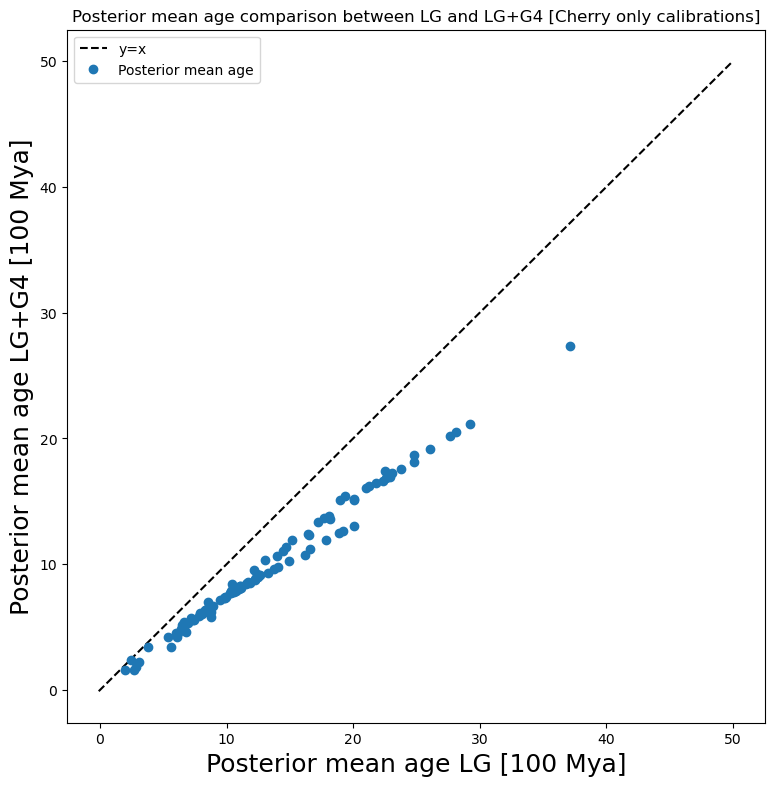

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_co_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_co_scatter.png')